# AI Insights Dataset Analysis

Colleen McKenzie and J. Bryce Hidysmith, _Median Group_

## Overview

This dataset collects a list of discoveries essential to the development of the current generation of artificial intelligence. We trace this development back as early as we have records of relevant intellectual progress—in this case, to Ancient Greek philosophy—looking for the foundations of complex new approaches.

Our goal in this project is to present an alternative to an achievement-based timeline of AI development. The development of new capabilities in machine intelligence frequently produces exciting tangible results, which dominate public conceptions of progress and are well-remembered in histories of the field, but such results are not always the product of novel technical insight. Some new abilities rely more on recombination of existing tools or on additional computational capacity—sufficient to solve complex problems efficiently, but not necessarily the most direct precursors of new tools for further recombination, or of new directions for future work without additional increases in computational efficiency. Our aim is to augment the current discourse of historically grounded forecasting by adding a specific discursive thread that tracks theoretical discoveries alone, complementing the more capability-focused accounts.

We've collected metadata about each discovery (and its discoverers) and looked for trends in their production. Our own findings are described below, but we encourage extension and additional evaluation of the data, and will publish our own ongoing work here.

## Methods & Assumptions
Our metric for what constitutes an insight is an estimate of how novel or surprising the results of that insight are, using a comparison of LSTM and RNNs as a baseline—that is, given that RNNs exist, how surprising is the development of LSTM? All discoveries that seem equally or more surprising were included in our set. This is one of many possible thresholds for significance we could have chosen, and the rationale behind ours is subjective:

Our focus on theoretical progress means that the data do not include progress captured in implementing an existing theory, or applying it more directly. For example, punched-card programming of early computers had clear impacts on the progress of computing, but we attribute the insight behind that technology to the [18th-century textile worker](https://en.wikipedia.org/wiki/Basile_Bouchon) who developed a punched-card method for programming looms. From this perspective, the application of punched cards to electrical computers is a combination of existing theories, not a new development in itself.


We consulted two existing chronicles of the history of AI in an effort to flesh out parts of our data set that may have fallen in our blind spots:
 - Nilsson, N. J. (2009). _The quest for artificial intelligence._ Cambridge University Press.
 - Crevier, D. (1993). _AI: the tumultuous history of the search for artificial intelligence._ Basic Books.

A few additional notes on the data:

- First to discover, not first to publish: We credit an insight to the first person known to have described it, as best we can determine through reputable sources, not the first person to publish that description. This practice is motivated in part by our understanding that not all discoverers published work in the academic tradition (e.g. William Newcomb, credited with the conception of Newcomb's problem), and in part by some discoveries' having been  kept confidential, pre-publication, in corporate and state departments.

- Specific vs. general discoveries: Sometimes an early discovery constitutes a special case of a later, more general discovery; in this case, we credit the more general discovery. If the special case itself seems to constitute an influential insight, we'll credit it as a separate line item; but if it was largely ignored, or was unavailable to discoverers of the more general version, we omit it from this list. For example, ideas from evolutionary biology have been rediscovered independently by AI researchers through simulationist and purely rationalistic investigation that were previously discovered empirically through biological field research before being formalized in such a manner that they could be used by AI researchers. We count the usable formalization, rather than the case studies that could be used as raw material for specifying the usable formalization. 

- Hardware agnosticism: Our focus here is on information theoretical insights, not on insights that aid in the development of new hardware, the rationale being that artificial intelligence is a substrate independent pursuit, provided that the Church-Turing thesis holds. Futher, charting the history of today's electronic computers alone would constitute a project of roughly equal magnitude, and one that aligns less closely with our area of expertise.


## Data & Parameters

The full dataset (as json) and its schema are available at [mediangroup.org/research](http://mediangroup.org/research); this section provides a brief overview of the data for readers of this report.

The set includes 193 total insights.

For each insight, we record the following information (plus sources for each fact):
- Name
- Year of discovery
- First work in which the insight was referenced or published
- Discoverer(s)
- Institutional affiliation of discoverer(s) at time of discovery (if applicable)
- Institution(s) sector and type (see below)
- Nation of origin of discoverer(s)
- Additional notes

Institutions are assigned rough sectors and types from the following lists:

Sectors:
- Academic
- Military
- Industrial
- State
- Other R&D
- Religious
- N/A

Types:
- Public university
- Private university
- For-profit entity
- Non-profit entity
- N/A

## Analysis

For the purposes of this first analysis section, we will discuss the data as we have been able to make it available to us. Reflections on the limitations of the data and the extent to which they are relevant to readership follow in the _Methodological Reflections_ section.

In [5]:
from collections import Counter
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = ['6', '4']

seaborn.set()
    

def aggregate_insights_timeline(xbounds=None, by_decade=False, diff=False, title=None):
    dates = []
    insights = [0]
    
    with open('insights.json', 'r') as file:
        for line in file:
            data = json.loads(line)
            if by_decade:
                date = int(data['year-as-number'])
                decade = (date // 10) * 10
                if len(dates) > 0 and decade == dates[-1]:
                    insights[-1] = insights[-1] + 1
                else:
                    dates.append(decade)
                    insights.append(1)
            else:
                dates.append(int(data['year-as-number']))
                insights.append(insights[-1] + 1)
    
    if diff:
        insights = np.diff(insights).tolist()
        print(insights)
    else:
        # get rid of leading 0 entry
        insights.pop(0)
    
    fig, ax = plt.subplots()
    if xbounds:
        ax.set(xlim=xbounds)

    if title:
        plt.title(title, fontdict = {'fontsize' : 16})
        
    plt.plot(dates, insights)
    plt.show()

### Temporal distribution

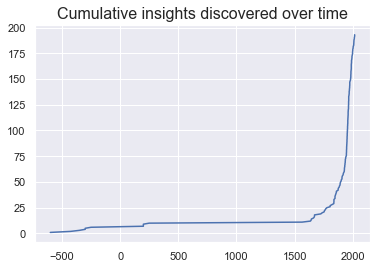

In [2]:
aggregate_insights_timeline(title='Cumulative insights discovered over time')

At a glance, the distribution of insights over time shows an expected uptick in progress contemporaneous with the European Enlightenment, followed by a sharp increase in the pace of discovery at the beginning of the 20th century. 

In [3]:
aggregate_insights_timeline(xbounds=(1600,2016), title='Cumulative insights since 1600')

A view of only the most recent centuries provides more detail on the arc of recent progress, showing a significant increase in production with introduction of digital computers available to major institutions in the late 1940s.

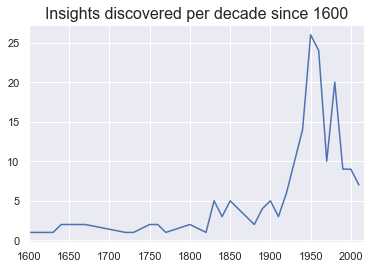

In [5]:
aggregate_insights_timeline(by_decade=True, xbounds=(1600,2016), title='Insights discovered per decade since 1600')

A breakdown of insight discoveries by decade clarifies the changing rates of discovery.


#### Historical context

The uneven distribution of insights correlates clearly with the trajectory of Western intellectual and economic history. The theological and philosophical conservatism of the middle ages matches the flat section of the first curve above from c. 500 - 1500 AD. During the middle ages, there was no sense of how economic or political advantage might be gained from the use of power not derived from human, animal, or natural sources (e.g. waterwheels applied to rivers). The media of the middle ages, too, was meant for interpretation by individual human minds, as opposed to instantiation on larger groups or in artificial substrates. For example, medieval alchemical texts were written with the expectation that the text is exclusively human-readable, and so the informational payload of the text is found not within the structure of the text as an object itself, but in the interpretation and implementation of the text by its human reader; this can be contrasted with the periodic table, which describes a structure already present in nonhuman substrate. This norm continued throughout most of the Enlightenment, perhaps reaching its height during the efforts of the Encyclopedists led by Denis Diderot. 

The philosophical ideas throughout the 18th and the first half of the 19th century provided the foundation for a scientific community able to take action during the industrial revolution, but the industrial revolution itself provided the necessary material tools for developing automation systems capable of directly realizing political, economic, or scientific goals. The technologies of the industrial revolution, including the social technologies of the factory and the joint stock company developed immediately prior during the late Enlightenment, differed from previous technologies in that they contianed _implicit_ instructions for their operation that were not simply transformations of a source of physical power such as a horse's muscles. A joint-stock company's organization can be thought of as a primative attempt at a superhuman intelligence implemented on a collection of individual human beings.

The transition to automated systems that lacked a human in their control loop was the advent of the Jaquard loom (captured in our data as an earlier insight by Basile Bouchon). Earlier automata in the West, the Muslim World, and China, were limited to toys, and their effects limited to the thought that they inspired in their viewers. The Digesting Duck, an automaton from eighteenth century France that crudely pretended the metabolism of a waterfowl, is as inert in its physical effect on the world as a child's toy truck or Michaelangelo's David except by inspiring the behavior of human agents. The automata of the industrial period became actors in their own right. The Jaquard Loom or a modern 3D printer takes a machine-readable instruction and produces an effect that is as physically relevant as if it had been accomplished by human labor. 

Though automation systems capable of acting as intelligent agents in their own right, rather than replacements for physical labor, could have been developed in the 19th century through the work of Babbage and Lovelace, the uses of cryptography and automatic aiming systems for artillery during the Second World War provided the industrial basis for their maturation. Blechley Park's work in decoding the German Enigma code was perhaps the first instance when computation at a scale not accomplishable in an individual human mind was required to counter an existential threat to a major power. Previous efforts in state computation by actors such as the US Government during the censuses of the 1870s and 1880s provided valuable technological precursors, but these calculating and tabulating machines were not true computers in the modern sense. Cryptographic and cryptoanalytic efforts during the wars provided the centralization of capital required to produce an abstract automation system in the form of Colossus, the first digital programmable computing device. Such an automation system that processs and transforms information rather than simply taking an instruction to produce a physical effect is obviously required for the development of modern artificial intelligence. We must further conjecture that the invention of programmable digital computing devices was required for the psychological conditions necessary for individual scientists and engineeers to experiment in the fields that would eventually birth artificial intelligence. There was only one Turing, publishing his basic principles of computability in _On Computable Numbers_ (1936), but there are an uncountable number of individuals able to experiment with the machines derived from these basic insights. 

The massive upward trend in insights following the end of the Second World War can thus be attributed to access to modern computing machines following their invention, as well as the incentivization of computer science and artificial intelligence research instrumentally by the states locked in conflict during the Cold War for purposes of military advantage. Artificial intelligence, like any intellectual pursuit undertaken as more than a recreation by those with leisure time and intrinsic interest, advances at pace with its support by institutions tasked with the necessities security and prosperity. 

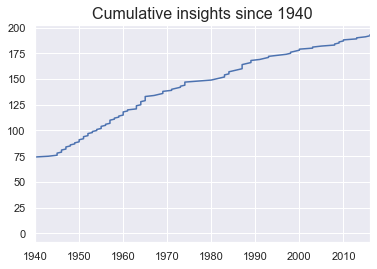

In [6]:
aggregate_insights_timeline(xbounds=(1940,2016), title='Cumulative insights since 1940')

The distribution of insights from the beginning of the Cold War to the present shows only a marginal deceleration after the fall of the Soviet Union, compared to the roughly linear rate of increase at the beginning of the Cold War. The shallower slopes of curves in the mid-1970s and the late 80s through early 90s correspond to the two periods now described as AI winters, when progress slowed.

The former of these two periods appears to be a more substantial decline in insights we measured. We expect this effect is a result of the 1970s being a period of application and combination of existing insights to new problem areas, without substantial generation of additional insights, in addition to the effect of decreased AI-related research during this period.

As Nilsson puts it:

"Until about the early 1970s, most AI research dealt with what Seymour Papert called 'toy' problems....However, soon after, AI efforts began a definite shift towards applications work, confronting problems of real-world importance....One reason for the increasing interest in applications was that the power of AI methods had increased to the point where realistic applications seemed within reach." (Nilsson, 207)

### Geocultural distribution

In [2]:
def insights_per_entity(entity_type='nation', xbounds=None, limit=10, diff=False, title=None):
    dates = []

    entities = {}
    with open('insights.json', 'r') as file:
        for line in file:
            data = json.loads(line)
            dates.append(int(data['year-as-number']))

            entities_present = []

            # Get list of entities associated with this insight
            for author in data['attributed-to']:
                entity_data = None
                if entity_type == 'nation':
                    entity_data = author['nationality-modern']

                elif entity_type == 'institution':
                    entity_data = author['institution']['institution-name']
                elif entity_type == 'individual':
                    entity_data = author['attributed-name']
                
                # separate by commas
                entity_list = re.split(r',\s', entity_data)
                    
                for entity in entity_list:
                    entity_clean = entity.strip()
                    match = re.search(r"(.*)\(.*\)", entity_clean)
                    if match:
                        entity_clean = match.group(1).strip()

                    if not entity_clean in entities_present:
                        entities_present.append(entity_clean)
                    

            # Increment aggregate for known entities associated with this insight;
            # don't increment for known entities not associated
            for entity in entities:
                if entity in entities_present:
                    entities[entity].append(entities[entity][-1] + 1)
                    entities_present.remove(entity)
                else:
                    entities[entity].append(entities[entity][-1])

            # Add unknown (i.e. new) entities from this insight to list of entities tracked
            for entity in entities_present:
                previous_insights = len(dates) - 1
                entities[entity] = [0 for x in range(previous_insights)]
                entities[entity].append(1)
            
    if entity_type == 'nation':
        entities.pop('unknown')
    elif entity_type == 'institution':
        entities.pop('Independent')
    
    fig, ax = plt.subplots()
    if xbounds:
        ax.set(xlim=xbounds)
    
    if title:
        plt.title(title, fontdict = {'fontsize' : 16})
    
    if diff:
        for entity in entities:
            entities[entity] = np.diff(entities[entity]).tolist()
            entities[entity].insert(0,0)
            plt.plot(dates, entities[entity], label=entity)
        plt.show()
    else:
        # Limit to top <limit> entries
        max_entity_values = {}
        for entity in entities:
            max_entity_values[entity] = entities[entity][-1]

        k = Counter(max_entity_values)
        top_entity_counts = k.most_common(limit)
        #print(top_entity_counts)

        top_entities = {}
        for entity_pair in top_entity_counts:
            entity = entity_pair[0]
            top_entities[entity] = entities[entity]


        entity_data = top_entities.values()
        ax.stackplot(dates, entity_data, labels=top_entities.keys())

        ax.legend(loc='upper left')
        plt.show()
        
        

        
        

def insights_by_institution(type_names, field_name, xbounds=None, diff=False, title=None):
    type_names.append('N/A')
    
    dates = []
    types = {}
    type_present = {}
    for name in type_names:
        types[name] = [0]
        type_present[name] = False

    with open('insights.json', 'r') as file:
        for line in file:
            data = json.loads(line)
            dates.append(int(data['year-as-number']))

            for author in data['attributed-to']:
                type = author['institution'][field_name]
                if type == None:
                    type = 'N/A'
                type_present[type] = True

            for type in types:
                if type_present[type]:
                    types[type].append(types[type][-1] + 1)
                else:
                    types[type].append(types[type][-1])

            for type in type_present:
                type_present[type] = False

    for type in types:
    # get rid of leading 0 entries
        types[type].pop(0)

    fig, ax = plt.subplots()
    if diff:
        for type in types:
            types[type] = np.diff(types[type]).tolist()
            types[type].insert(0,0)
    
    type_data = types.values()
    
    if xbounds:
        ax.set(xlim=xbounds)
    
    if diff:
        for (type, val) in types.items():
            plt.plot(dates, val, label=type)
    else:
        ax.stackplot(dates, type_data, labels=type_names)
        
    if title:
        plt.title(title, fontdict = {'fontsize' : 16})

    ax.legend(loc='upper left')
    plt.show()

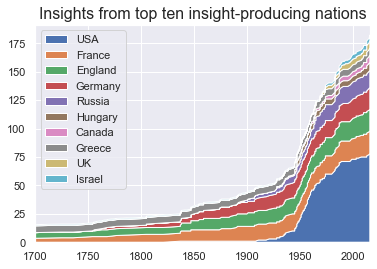

In [9]:
insights_per_entity(xbounds=(1700,2016), title='Insights from top ten insight-producing nations')

(Note: data for "Russia" includes insights produced by Soviet scientists born within Russian borders and working at historically Russian institutions.)

The distribution of insights by nationality of discover reflects a number of well-understood trends in intellectual history. Ancient Greece provided the intellectual foundations that England and France then built upon during the Enlightenment, before the rise of Germany as it indutrialized and centralized politically. 

During the twentieth century, the rise of both the Russian and American superpowers correlated to substantial advances, but the United States dramatically outcompeted the Soviet Union. Some of the gains that could be credited to the Soviet Union if one assumes a model based on spheres of influence are marked as Hungarian in origin, as well as a few other countries such as Moldova that did not make it into the top ten. The United States' position as an aggregator of immigrants and refugees from Europe during and after the Second World War substantially increases the number of entries counted as American. The circumstances that made such devices available were not only economic but also politically strategic, as the political aims of military supremacy by both the United States and the Soviet Union during the Cold War enabled their local markets to distribute said computing machines. Additionally, given that the state of Israel was not established until 1949, entries there only date to that time, though many of the scientists who immigrated to Israel and established the scholarly communities that contributed to AI efforts originated in Soviet or American territory. 

### Institutional distribution

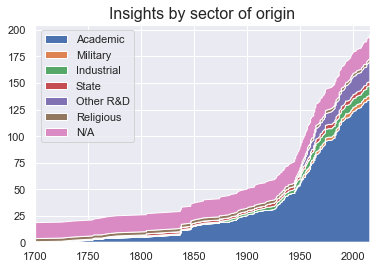

In [8]:
sector_types = ['Academic', 'Military', 'Industrial', 'State', 'Other R&D',
                'Religious']

insights_by_institution(sector_types, 'institution-sector', xbounds=(1700, 2016), title="Insights by sector of origin")

In [6]:
insights_per_entity(entity_type='institution', xbounds=(1900,2016), title="Insights from top ten insight-producing institutions")

The vast majority of insights in our dataset, unsurprisingly, were discovered and developed by individuals at academic institutions. Early progress in mathematics and the sciences was due mostly to unaffiliated individuals—including most researchers from antiquity and the Renaissance—but as academic institutions gained prestige and resulting brilliance, they began to outcompete other institutional types.

Two trends stand out in the latter part of the 20th century: the increase in output from nonacademic R&D institutions, and the slight increase in insights derived within military institutions.

Nonacademic R&D includes institutions such as Bell Laboratories and the RAND Corporation, and appears in our data first in 1947 (an attribution to Bell Labs's John Tukey). Bell Laboratories (or Bell Labs) was an unusual institution, in historical context, and in many ways the first of its kind: a result of a step-function increase in the engineering progress needed for telecommunications infrastructure, Bell Labs was incubated within the monopolistic Bell Telephone Company before its 1984 dissolution after a successful antitrust suit. Within it, researchers such as Shannon, Shockley, and Hamming developed some of the core advances of their fields, and it has continued to produce novel research for decades: the most recent insight to come out of Bell Labs, in our data, was from 1995. The RAND Corporation, in contrast, was developed in response to state officials suggesting potential benefits from private involvement in relevant research areas, and RAND itself developed out of an aircraft company, becoming a separate, nonprofit institution in 1948. While insights from RAND represent a shorter timespan in our dataset, limited to just the decade between 1950 and 1960, they outnumber those from any institution besides Stanford and Princeton universities, well-known powerhouses of AI development, by the present day. Dynamic programming (Bellman) and symbolic AI (Newell, Shaw, and Simon) are notable among its body of production.


The relative scarcity of of military institutions in our data suggests a more indirect role due to military involvement. The development of artificial intelligence is deeply entangled with military concerns, but miliary institutions seem to have been sources of demand for progress, not sources of progress itself. DARPA, for example, often contracted independent entities such as SRI or teams of collaborating academics to execute on finding solutions in its areas of interest. We note when such entities were affiliated with military institutions, though few such instances occur in our data.

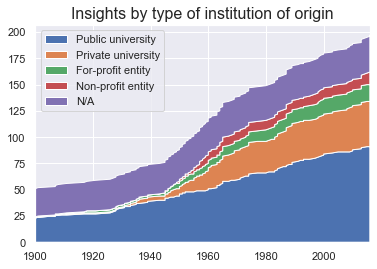

In [11]:
institution_types = ['Public university', 'Private university', 'For-profit entity', 'Non-profit entity', 'N/A']
insights_by_institution(institution_types, 'institution-type', xbounds=(1900,2016), title="Insights by type of institution of origin")

A final note on the breakdown of insights among institutional entities: while the credit owed to academic institutions is clear, nonacademic institutions have been contributing an increasing portion of total progress since the middle of the 20th century. We were surprised to see a near even distribution of insights between for-profit and non-profit entities—though RAND Corporation constitutes the bulk of the latter—in recent decades, and we suppose that this supports the importance of ongoing invesment in independent organizations focused on AI whose mission is explicitly aligned with public good.

### Methodological reflections

Our methods generate a view of the past through a particular cultural lens—specifically, that of young American computer scientists. This project is not an attempt at the impossible task of aggregating all insights into artificial intelligence that exist, rather it is an attempt from our position to aggregate the ones interpretable to ourselves. As we are roughly in the same position socially as other artificial intelligence resarchers in the Anglosphere, we expect that the amount of insights accessible to Anglosphere researchers will be analagous to those accessible to ourselves. There may be other paths to artificial intelligence development that are only accessible to individuals with differing social position, technical knowledge, or linguistic and cultural proficiency. Though it is certainly likely that such paths exist, we can make no comment on their rate of advancement. 

Additionally, it seems prudent to make note of the likely presence of survivorship bias: we are limited to only the information that has survived to the point of being accessible to ourselves. It is possible that many of the insights of the past that we have analyzed—particularly the distant past—were developed with the aid of information sources that no longer exist, either dead with the minds that generated them or lost with the documents that once preserved them. As with any field, this lost information may compromise the ability of individuals in the present to correctly interpret and use past insights. This case of survivorship bias is unavoiable, and mitigatable to the degree that present researchers remain aware of it. Related work on this topic is available from Samo Burja of Bismarck Analysis, in his essay [_Intellectual Dark Matter_](https://medium.com/the-long-now-foundation/intellectual-dark-matter-2e5890aa8d8f).